<a href="https://colab.research.google.com/github/raymori7991/KalmanFilterExample/blob/main/KalmanFilterExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110459 sha256=112235ebe58c64007dd6fd327a88aeb09ba5e5028c54101307249ae953366bfe
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


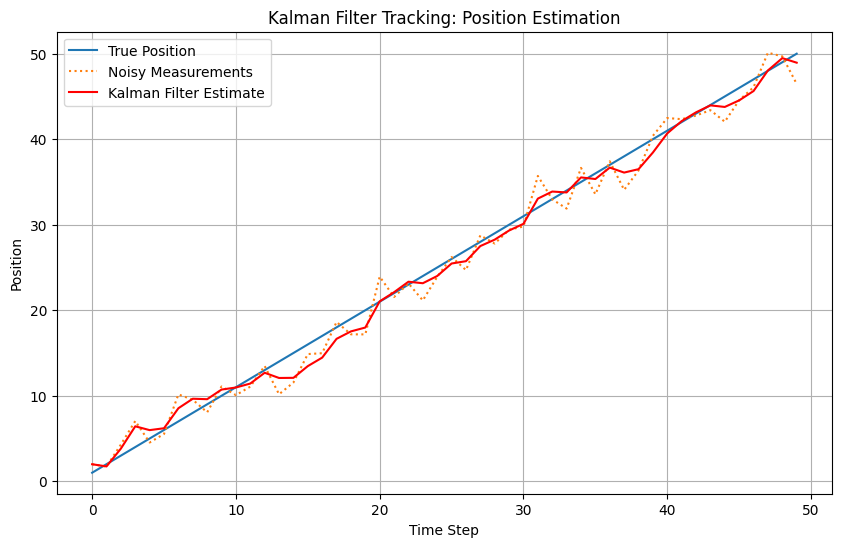

Final estimated velocity: 0.81 m/s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

# Simulated data: true position and noisy measurements
np.random.seed(42)
dt = 1.0  # time step
true_position = 0.0
true_velocity = 1.0  # m/s (constant velocity)
num_steps = 50
positions = []
measurements = []

for i in range(num_steps):
    true_position += true_velocity * dt
    noisy_measurement = true_position + np.random.normal(0, 2)  # position with noise
    positions.append(true_position)
    measurements.append(noisy_measurement)

# Initialize Kalman Filter
kf = KalmanFilter(dim_x=2, dim_z=1)  # 2 state variables (position, velocity), 1 measurement variable (position)
kf.x = np.array([[0.], [1.]])  # initial state: [initial position, initial velocity]

kf.F = np.array([[1, dt],  # state transition matrix
                 [0, 1]])  # velocity is constant

kf.H = np.array([[1, 0]])  # measurement matrix (we only measure position)

kf.P *= 1000.  # large initial uncertainty
kf.R = 4  # measurement noise (variance of position measurement)
kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.1)  # process noise (uncertainty in model)

# Arrays to hold estimates
filtered_positions = []
filtered_velocities = []

# Perform Kalman Filtering
for z in measurements:
    kf.predict()
    kf.update([z])

    filtered_positions.append(kf.x[0][0])  # estimated position
    filtered_velocities.append(kf.x[1][0])  # estimated velocity

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(positions, label='True Position')
plt.plot(measurements, label='Noisy Measurements', linestyle='dotted')
plt.plot(filtered_positions, label='Kalman Filter Estimate', linestyle='solid', color='red')
plt.title('Kalman Filter Tracking: Position Estimation')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()

# Optional: Print out final estimated velocity
print(f"Final estimated velocity: {filtered_velocities[-1]:.2f} m/s")